# Microsoft : Classifying Cybersecurity Incidents with Machine Learning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read CSV file

df = pd.read_csv(r'C:\Users\Dell\Desktop\VS code\Cybersecurity\GUIDE_Train.csv.zip')

In [3]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [3]:
# List of columns to remove
columns_to_remove = ['Id','OrgId','MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId',
                     'ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel',
                     'LastVerdict','FolderPath','ApplicationId']

df.drop(columns=columns_to_remove, inplace=True)

In [4]:
df.shape

(9516837, 31)

In [5]:
df.columns

Index(['IncidentId', 'AlertId', 'Timestamp', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationName', 'OAuthApplicationId', 'FileName', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 31 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   IncidentId          int64 
 1   AlertId             int64 
 2   Timestamp           object
 3   DetectorId          int64 
 4   AlertTitle          int64 
 5   Category            object
 6   IncidentGrade       object
 7   EntityType          object
 8   EvidenceRole        object
 9   DeviceId            int64 
 10  Sha256              int64 
 11  IpAddress           int64 
 12  Url                 int64 
 13  AccountSid          int64 
 14  AccountUpn          int64 
 15  AccountObjectId     int64 
 16  AccountName         int64 
 17  DeviceName          int64 
 18  NetworkMessageId    int64 
 19  RegistryKey         int64 
 20  RegistryValueName   int64 
 21  RegistryValueData   int64 
 22  ApplicationName     int64 
 23  OAuthApplicationId  int64 
 24  FileName            int64 
 25  ResourceIdName    

In [9]:
df.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [37]:
import pandas as pd

# Assuming df is your DataFrame and cat is the list of categorical columns
cat = ['City', 'State', 'CountryCode', 'DeviceName', 'AccountName', 'Url', 'IpAddress', 
       'EvidenceRole', 'EntityType', 'IncidentGrade', 'Category','FileName',
       'OSVersion','OAuthApplicationId','AlertTitle','DeviceId',
       'NetworkMessageId','RegistryValueData','ApplicationName','Sha256',
       'ResourceIdName','OSFamily']

# Convert columns to category dtype
for column in cat:
    df[column] = df[column].astype(str)


In [38]:
# Define a function to simplify categories
def simplify_categories(df, column, top_n=5):
    top_categories = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Others')

# Apply the function to each categorical column
for column in cat:
    simplify_categories(df, column)


In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
# Example: Extract hour of the day and day of the week from a timestamp feature
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df.drop(columns=['Timestamp'], inplace=True)


In [ ]:
# Categorical columns provided by you
cat = ['City', 'State', 'CountryCode', 'DeviceName', 'AccountName', 'Url', 'IpAddress', 
       'EvidenceRole', 'EntityType', 'IncidentGrade', 'Category','FileName',
       'OSVersion','OAuthApplicationId','AlertTitle','DeviceId',
       'NetworkMessageId','RegistryValueData','ApplicationName','Sha256',
       'ResourceIdName','OSFamily']

#LabelEncoder

In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for column in cat:
    df[column] = le.fit_transform(df[column])


In [12]:
df

,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,...,OAuthApplicationId,FileName,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,hour,day_of_week
0,612,123247,7,5,3,2,1,1,4,2,...,4,3,4,4,4,5,5,4,6,1
1,326,210035,58,5,1,1,5,0,4,2,...,4,3,4,4,4,3,2,2,3,4
2,58352,712507,423,5,3,1,4,1,4,2,...,4,3,4,4,4,3,2,2,4,3
3,32992,774301,2,2,0,0,4,1,4,2,...,4,3,4,4,4,3,2,2,16,0
4,4359,188041,9,5,4,2,5,0,4,2,...,4,3,4,4,4,3,2,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,90,496631,7,5,3,2,4,1,4,2,...,4,3,4,4,4,3,2,2,15,5
9516833,196410,748366,2,2,0,0,4,1,4,2,...,4,3,4,4,4,3,2,2,9,3
9516834,14117,7425,78,5,1,0,3,0,4,2,...,4,3,4,4,4,3,2,2,22,1
9516835,644,8973,52,5,2,0,1,1,4,2,...,4,3,4,4,4,3,2,2,23,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 32 columns):
 #   Column              Dtype
---  ------              -----
 0   IncidentId          int64
 1   AlertId             int64
 2   DetectorId          int64
 3   AlertTitle          int64
 4   Category            int64
 5   IncidentGrade       int64
 6   EntityType          int64
 7   EvidenceRole        int64
 8   DeviceId            int64
 9   Sha256              int64
 10  IpAddress           int64
 11  Url                 int64
 12  AccountSid          int64
 13  AccountUpn          int64
 14  AccountObjectId     int64
 15  AccountName         int64
 16  DeviceName          int64
 17  NetworkMessageId    int64
 18  RegistryKey         int64
 19  RegistryValueName   int64
 20  RegistryValueData   int64
 21  ApplicationName     int64
 22  OAuthApplicationId  int64
 23  FileName            int64
 24  ResourceIdName      int64
 25  OSFamily            int64
 26  OSVersion     

#Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['IncidentGrade'])  # Features
y = df['IncidentGrade']  # Target

# Stratified Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [33]:
X_train

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,...,ApplicationName,OAuthApplicationId,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,hour,day_of_week
7444006,6,137927,690659,2,2,1,31,1,98799,138268,...,3421,881,3586,5,54,153,422,514,4,5
3007190,18,199682,1555975,9,32,6,11,1,98799,43901,...,3421,881,3586,5,54,153,422,514,18,3
5077666,132,48008,117433,13,11,10,21,1,98799,138268,...,3421,881,3586,5,54,153,422,514,21,2
156413,39,423,7698,6,5,10,20,1,98799,138268,...,3421,881,3586,5,54,153,422,514,0,5
694534,37,52,12207,125,6293,7,21,0,98799,138268,...,3421,881,3586,5,54,153,422,514,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095092,25,103,41745,30,10673,7,21,0,98799,138268,...,3421,881,3586,5,54,153,422,514,16,1
716357,0,343,170885,7,6,10,6,1,98799,138268,...,3421,881,3586,5,54,153,422,514,3,6
7831240,246,592192,1665222,5,49,16,5,0,98799,138268,...,5,881,3586,5,54,153,422,514,1,2
1446857,51,31044,134520,39,26,6,27,1,98799,4,...,3421,881,3586,5,54,153,422,514,7,0


In [20]:
y_train

3424246    2
4285604    0
1296710    1
3262113    0
609448     1
          ..
1763754    2
5065123    2
5359074    0
7945288    2
6703560    1
Name: IncidentGrade, Length: 7572397, dtype: int64

#LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression

le = LogisticRegression()

le.fit(X_train, y_train)

LogisticRegression()

In [18]:
#Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define k-fold cross-validation with stratified sampling
k = 5 
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the scoring metric (F1 score with macro average)
scoring = make_scorer(f1_score, average='macro')

# Perform k-fold cross-validation using the correct scoring parameter
cv_scores = cross_val_score(le, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)

In [19]:
cv_scores

array([0.34716683, 0.27235623, 0.360068  , 0.34814264, 0.27243751])

In [20]:
cv_scores.mean()

np.float64(0.32003424225628196)

In [ ]:
#Performance Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,accuracy_score

# Predict on the validation set
y_pred_val = le.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val,y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

In [51]:
print(f"Macro accuracy Score: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro accuracy Score: 0.4752
Macro F1 Score: 0.2553
Macro Precision: 0.2341
Macro Recall: 0.2941


In [35]:
# Detailed classification report
print(classification_report(y_val, y_pred_val, target_names=['TP', 'BP', 'FP']))

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          TP       0.34      0.51      0.41    120000
          BP       0.00      0.00      0.00    120000
          FP       0.34      0.51      0.41    120000

    accuracy                           0.34    360000
   macro avg       0.23      0.34      0.27    360000
weighted avg       0.23      0.34      0.27    360000



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV


# Define a more focused parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200],
}

random_search = RandomizedSearchCV(le,param_distributions=param_grid,n_iter=10,cv=3,n_jobs=-1)


# Fit RandomizedSearchCV on the sampled training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

In [52]:
print("Best Parameters:", best_params)
print("Best F1 Macro Score:", best_score)

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'C': 0.1}
Best F1 Macro Score: 0.44295625


In [53]:
#Handling Class Imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Train the XGBoost model on the resampled data
le.fit(X_train_res, y_train_res)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\1419014526.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming X_train_sample and y_train_sample are defined as subsets of your data
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Feature names from the sampled training set
feature_names = X_train_sample.columns

# Compute permutation importance
results = permutation_importance(le, X_train_sample, y_train_sample, scoring='f1_macro', n_jobs=-1)

# Get the mean importance values
importance = results.importances_mean


In [55]:
importance

array([ 1.40553244e-04,  0.00000000e+00,  7.69918758e-03,  1.23879037e-02,
        0.00000000e+00,  1.96233397e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.06349926e-05,  2.94603871e-05,  3.53724840e-03, -1.10729608e-04,
        2.38696810e-03,  1.98393476e-03,  2.41583429e-03,  2.32623560e-03,
       -1.27210693e-06, -5.99240725e-04,  3.41881271e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  7.18541025e-04,  3.51391112e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.35673705e-06, -1.00696182e-05,  0.00000000e+00,
        0.00000000e+00])

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate predictions
y_pred = le.predict(X_val)


In [57]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=le.classes_)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[75643 16675 27682]
 [67280 11524 41196]
 [48130 21027 50843]]


In [58]:
# Generate a classification report for precision, recall, and F1-score
report = classification_report(y_val, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.395927,0.630358,0.486367,120000.000000
1,0.234104,0.096033,0.136197,120000.000000
2,0.424679,0.423692,0.424185,120000.000000
accuracy,0.383361,0.383361,0.383361,0.383361
macro avg,0.351570,0.383361,0.348916,360000.000000
weighted avg,0.351570,0.383361,0.348916,360000.000000


In [59]:
# Create a DataFrame of actual vs predicted values
misclassified = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Index': X_val.index})

# Filter out the correct predictions
misclassified = misclassified[misclassified['Actual'] != misclassified['Predicted']]

# Show misclassified instances
misclassified.head()

,Actual,Predicted,Index
6715122,1,0,6715122
8781228,2,0,8781228
2608998,2,0,2608998
937637,1,0,937637
8071942,1,0,8071942


#RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
#Performance Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,accuracy_score

# Predict on the validation set
y_pred_val = rf.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val,y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

In [17]:
print(f"Macro accurancy Score: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro accurancy Score: 0.6577
Macro F1 Score: 0.4331
Macro Precision: 0.5930
Macro Recall: 0.4323


In [ ]:
# Detailed classification report
print(classification_report(y_val, y_pred_val))

In [ ]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV


# Define a parameter grid specific to RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],  # Fewer trees to start with
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(rf,param_distributions=param_grid,n_iter=5,cv=3,n_jobs=-1)


# Fit RandomizedSearchCV on the sampled training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

In [32]:
print("Best Parameters:", best_params)
print("Best F1 Macro Score:", best_score)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}
Best F1 Macro Score: 0.6912784722222222


In [81]:
#Handling Class Imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Train the XGBoost model on the resampled data
rf.set_params(verbose=1)
rf.fit(X_train_res, y_train_res)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\2977527880.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  6.4min


RandomForestClassifier(verbose=1)

In [ ]:
#Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Further reduce the sample size for quicker testing
X_train_sample = X_train.sample(n=100000, random_state=42)  # Limit to 1000 samples
y_train_sample = y_train.loc[X_train_sample.index]

# Feature names from the sampled training set
feature_names = X_train_sample.columns

# Compute permutation importance with a simplified model (smaller n_estimators)
simplified_rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
simplified_rf.fit(X_train_sample, y_train_sample)

# Compute permutation importance
results = permutation_importance(simplified_rf, X_train_sample, y_train_sample, scoring='f1_macro', n_jobs=2)  # Limit parallel jobs

# Get the mean importance values
importance = results.importances_mean


In [85]:
importance

array([ 1.69184832e-03,  4.17404723e-02,  6.13749020e-02,  4.09361657e-02,
        5.21038110e-02,  1.57344396e-02, -4.23189827e-04,  1.73268194e-02,
        5.00968245e-06,  0.00000000e+00,  3.24535048e-03,  3.69869697e-03,
        7.89127232e-05,  6.90233520e-06,  4.72564110e-03,  0.00000000e+00,
        1.31551268e-03,  1.90825580e-03,  2.51653176e-03,  4.56566421e-03,
        2.50320726e-03,  2.10634462e-03,  2.28131656e-06,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.21685589e-04,  1.17297481e-03,
        0.00000000e+00,  0.00000000e+00,  2.91353397e-03, -8.23285630e-04,
        0.00000000e+00,  0.00000000e+00,  2.18445263e-05,  1.11886386e-04,
        1.83470088e-04, -2.81237341e-04, -1.90631746e-03, -8.54365328e-04,
        6.83174212e-03,  1.74513460e-04,  2.13953798e-03,  5.85007506e-04,
        5.03483591e-05])

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate predictions
y_pred = rf.predict(X_val)

In [34]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=rf.classes_)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[86060 22817 11123]
 [44248 47349 28403]
 [28634 12484 78882]]


In [35]:
# Generate a classification report for precision, recall, and F1-score
report = classification_report(y_val, y_pred, target_names=rf.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.541455,0.717167,0.617046,120000.000000
1,0.572886,0.394575,0.467298,120000.000000
2,0.666188,0.657350,0.661740,120000.000000
accuracy,0.589697,0.589697,0.589697,0.589697
macro avg,0.593510,0.589697,0.582028,360000.000000
weighted avg,0.593510,0.589697,0.582028,360000.000000


In [36]:
# Create a DataFrame of actual vs predicted values
misclassified = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Index': X_val.index})

# Filter out the correct predictions
misclassified = misclassified[misclassified['Actual'] != misclassified['Predicted']]

# Show misclassified instances
misclassified.head()


,Actual,Predicted,Index
6545716,1,0,6545716
4751206,2,0,4751206
7026336,2,0,7026336
713359,0,1,713359
3222539,1,0,3222539


#XGBClassifier

In [61]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
#Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define k-fold cross-validation with stratified sampling
k = 5 
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the scoring metric (F1 score with macro average)
scoring = make_scorer(f1_score, average='macro')

# Perform k-fold cross-validation using the correct scoring parameter
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=scoring, n_jobs=-1)

In [66]:
cv_scores

array([0.91535301, 0.91309081, 0.91332378, 0.91657026, 0.9145183 ])

In [67]:
cv_scores.mean()

np.float64(0.9145712319468575)

In [68]:
#Performance Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score,accuracy_score

# Predict on the validation set
y_pred_val = xgb_model.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

In [69]:
print(f"Macro accuracy Score: {accuracy:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro accuracy Score: 0.9145
Macro F1 Score: 0.9203
Macro Precision: 0.9291
Macro Recall: 0.9137


In [70]:
# Detailed classification report
print(classification_report(y_val, y_pred_val, target_names=['TP', 'BP', 'FP']))

              precision    recall  f1-score   support

          TP       0.90      0.91      0.91    120000
          BP       0.90      0.92      0.91    120000
          FP       0.94      0.90      0.92    120000

    accuracy                           0.91    360000
   macro avg       0.91      0.91      0.91    360000
weighted avg       0.91      0.91      0.91    360000



In [ ]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV


# Define a more focused parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01],
    'max_depth': [3],
    'n_estimators': [100],
    'subsample': [0.8]
}

random_search = RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=10,cv=3,n_jobs=-1)


# Fit RandomizedSearchCV on the sampled training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

In [73]:
print("Best Parameters:", best_params)
print("Best F1 Macro Score:", best_score)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Best F1 Macro Score: 0.6118298611111112


In [45]:
#Handling Class Imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Train the XGBoost model on the resampled data
xgb_model.fit(X_train_res, y_train_res)



C:\Users\Dell\AppData\Local\Temp\ipykernel_12716\3452253177.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming X_train_sample and y_train_sample are defined as subsets of your data
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Feature names from the sampled training set
feature_names = X_train_sample.columns

# Compute permutation importance
results = permutation_importance(xgb_model, X_train_sample, y_train_sample, scoring='f1_macro', n_jobs=-1)

# Get the mean importance values
importance = results.importances_mean


In [34]:
importance

array([ 7.74504590e-03,  2.91159722e-01,  8.72367924e-02,  6.89946515e-02,
        7.27548453e-02,  2.82963598e-02,  1.99041985e-02,  1.58828665e-02,
        1.28090234e-06,  7.60727237e-05,  2.38691599e-03,  4.43364400e-04,
        1.06960119e-03,  5.40592939e-04,  2.14892410e-03,  1.13662045e-03,
        2.21489861e-03,  3.15400488e-03,  1.71756812e-03,  1.02428191e-03,
        9.74885234e-04,  9.95144861e-04,  7.76076105e-05,  8.88513281e-05,
        1.72175307e-05,  7.69743784e-06,  1.20355560e-04,  3.55485844e-04,
        0.00000000e+00, -8.23416083e-06,  8.45079510e-04,  9.19930063e-04,
        1.86335919e-05,  4.39238109e-05,  6.19736351e-04,  1.14356040e-04,
        4.51471508e-05,  1.59295183e-04,  1.66088350e-03,  8.48869089e-04,
        2.28911893e-03,  3.85987648e-05,  1.75643377e-04])

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Generate predictions
y_pred = xgb_model.predict(X_val)


In [16]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=xgb_model.classes_)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[109243   7520   3237]
 [  5481 111568   2951]
 [  6116   5827 108057]]


In [17]:
# Generate a classification report for precision, recall, and F1-score
report = classification_report(y_val, y_pred, target_names=xgb_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.904030,0.910358,0.907183,120000.000000
1,0.893151,0.929733,0.911075,120000.000000
2,0.945836,0.900475,0.922598,120000.000000
accuracy,0.913522,0.913522,0.913522,0.913522
macro avg,0.914339,0.913522,0.913619,360000.000000
weighted avg,0.914339,0.913522,0.913619,360000.000000


In [18]:
# Create a DataFrame of actual vs predicted values
misclassified = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Index': X_val.index})

# Filter out the correct predictions
misclassified = misclassified[misclassified['Actual'] != misclassified['Predicted']]

# Show misclassified instances
misclassified.head()


,Actual,Predicted,Index
6199460,0,1,6199460
2367687,2,0,2367687
5731838,2,1,5731838
503382,0,1,503382
5259128,0,1,5259128


#Test Data

In [18]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv(r'C:\Users\Dell\Desktop\VS code\Cybersecurity\GUIDE_Test.csv.zip')

C:\Users\Dell\AppData\Local\Temp\ipykernel_5564\907223106.py:4: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(r'C:\Users\Dell\Desktop\VS code\Cybersecurity\GUIDE_Test.csv.zip')


In [19]:
# List of columns to remove
columns_to_remove = ['Id','OrgId','MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId',
                     'ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel',
                     'LastVerdict','FolderPath','ApplicationId']

test_df.drop(columns=columns_to_remove, inplace=True)

In [20]:
# Example: Extract hour of the day and day of the week from a timestamp feature
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])
test_df['hour'] = test_df['Timestamp'].dt.hour
test_df['day_of_week'] = test_df['Timestamp'].dt.dayofweek
test_df.drop(columns=['Timestamp'], inplace=True)


In [21]:
import pandas as pd

# Assuming df is your DataFrame and cat is the list of categorical columns
cat = ['City', 'State', 'CountryCode', 'DeviceName', 'AccountName', 'Url', 'IpAddress', 
       'EvidenceRole', 'EntityType', 'IncidentGrade', 'Category','FileName',
       'OSVersion','OAuthApplicationId','AlertTitle','DeviceId',
       'NetworkMessageId','RegistryValueData','ApplicationName','Sha256',
       'ResourceIdName','OSFamily','Usage']

# Convert columns to category dtype
for column in cat:
    test_df[column] = test_df[column].astype(str)


In [22]:
# Define a function to simplify categories
def simplify_categories(test_df, column, top_n=5):
    top_categories = test_df[column].value_counts().nlargest(top_n).index
    test_df[column] = test_df[column].apply(lambda x: x if x in top_categories else 'Others')

# Apply the function to each categorical column
for column in cat:
    simplify_categories(test_df, column)


In [23]:
test_df.dropna(axis=0,inplace=True)

#Test LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for column in cat:
    test_df[column] = le.fit_transform(test_df[column])


#Test Data Splitting

In [25]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = test_df.drop(columns=['IncidentGrade'])  # Features
y = test_df['IncidentGrade']  # Target

# Stratified Train-Validation Split
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
X_test

,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,...,FileName,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,hour,day_of_week
964710,126027,114202,147,5,1,3,0,4,2,3,...,3,3,4,4,3,2,2,1,5,3
3888127,3818,2775,29,5,2,1,1,4,2,5,...,3,3,4,4,3,2,2,0,8,4
1197100,25333,660795,902,5,3,5,0,4,2,3,...,3,3,4,4,3,2,2,1,15,1
3989738,176917,283583,2,2,0,4,1,4,2,3,...,3,3,4,4,3,2,2,1,9,0
3108077,206,165890,4,3,3,5,0,4,2,3,...,3,3,4,4,3,2,2,1,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470041,14471,1435444,31,5,4,2,0,1,2,3,...,3,3,0,0,3,2,2,1,9,1
216536,9883,3443,11,5,3,4,0,4,2,3,...,3,3,4,4,3,2,2,1,19,3
1940304,172,1035190,0,0,3,1,1,4,2,5,...,3,3,4,4,5,5,5,1,21,0
3276366,6208,135880,39,5,4,2,0,5,2,3,...,3,3,4,4,3,2,2,0,5,1


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf.fit(X_test, y_test)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [58]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Predict on the validation set
y_pred_val = rf.predict(X_val)

# Calculate and print evaluation metrics
f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

In [59]:
print(f"Macro F1 Score: {f1:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")

Macro F1 Score: 0.6478
Macro Precision: 0.8198
Macro Recall: 0.6318


In [13]:
# Detailed classification report
print(classification_report(y_val, y_pred_val, target_names=['TP', 'BP', 'FP']))

              precision    recall  f1-score   support

          TP       0.57      0.78      0.66    120000
          BP       0.66      0.41      0.50    120000
          FP       0.65      0.66      0.66    120000

    accuracy                           0.62    360000
   macro avg       0.63      0.62      0.61    360000
weighted avg       0.63      0.62      0.61    360000



#baseline model fitting [RandomForestClassifier]

In [28]:

from sklearn.metrics import f1_score, accuracy_score


# Ensure X_test has the same columns as X_train
X_test = X_test[X_train.columns]

# Train the model
baseline_model = rf
baseline_model.fit(X_train, y_train)

# Predict on the test set
baseline_predictions = baseline_model.predict(X_test)

# Calculate baseline performance metrics
baseline_f1 = f1_score(y_test, baseline_predictions, average='macro')
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print(f"Baseline Macro F1 Score: {baseline_f1:.4f}")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")



Baseline Macro F1 Score: 0.5332
Baseline Accuracy: 0.6474


#Trained RandomForestClassifier Model

In [29]:
model_predictions = rf.predict(X_test)  
model_f1 = f1_score(y_test, model_predictions, average='macro')
model_accuracy = accuracy_score(y_test, model_predictions)

In [30]:
print("Baseline Model Performance:")
print(f"F1 Score: {baseline_f1:.4f}")
print(f"Accuracy: {baseline_accuracy:.4f}\n")

print("Trained Model Performance:")
print(f"F1 Score: {model_f1:.4f}")
print(f"Accuracy: {model_accuracy:.4f}\n")

Baseline Model Performance:
F1 Score: 0.5332
Accuracy: 0.6474

Trained Model Performance:
F1 Score: 0.5332
Accuracy: 0.6474



In [31]:
import matplotlib.pyplot as plt

labels = ['Baseline', 'Trained Model']
f1_scores = [baseline_f1, model_f1]
accuracies = [baseline_accuracy, model_accuracy]

x = range(len(labels))

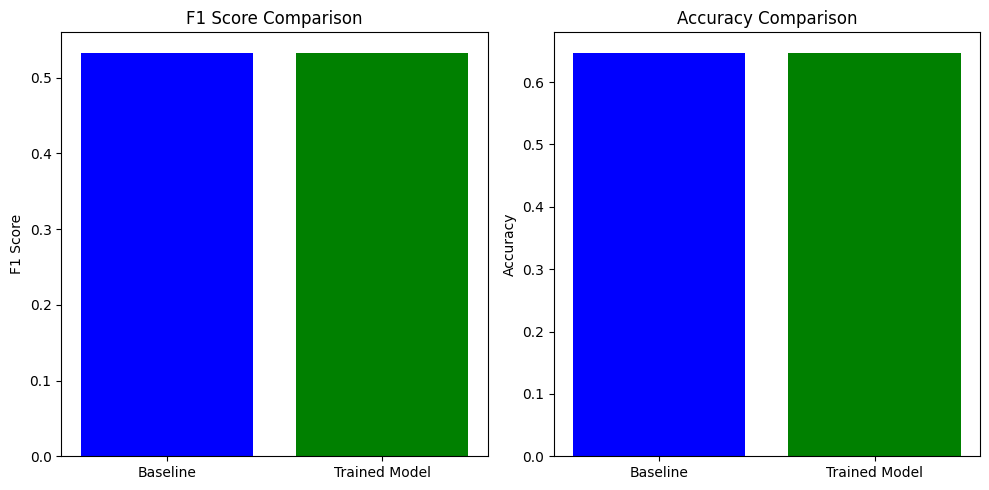

In [32]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(x, f1_scores, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

plt.subplot(1, 2, 2)
plt.bar(x, accuracies, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.tight_layout()
plt.show()